In [1]:
# Adding Imports
# File Imports
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from bayes_opt import BayesianOptimization
from tqdm import tqdm, tqdm_notebook
from pylab import rcParams
from itertools import islice
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, svm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from random import random
from statsmodels.tsa.ar_model import AR
from userInputs import *
from backbone import *
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Library Imports
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd  # Basic library for all of our dataset operations
import numpy as np
import requests
import io
import statsmodels.tsa.api as smt
import statsmodels as sm
import pmdarima as pm
import warnings
import xgboost as xgb
from math import sqrt
from metrics import evaluate
from plots import bar_metrics


warnings.filterwarnings("ignore")


# from fbprophet import Prophet


# Extra settings
seed = 42
# tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
# print(tf.__version__)

Enter the path of the dataset :amazon.csv
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 7 columns and 3019 rows
         Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2  2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3  2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
4  2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN
Enter the Date Column :Date
             Open   High    Low  Close   Volume  Name
Datetime                                             
2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN
Exploring the different series' present in the DataFrame
Groups are : [0, 1, 2, 3, 4]


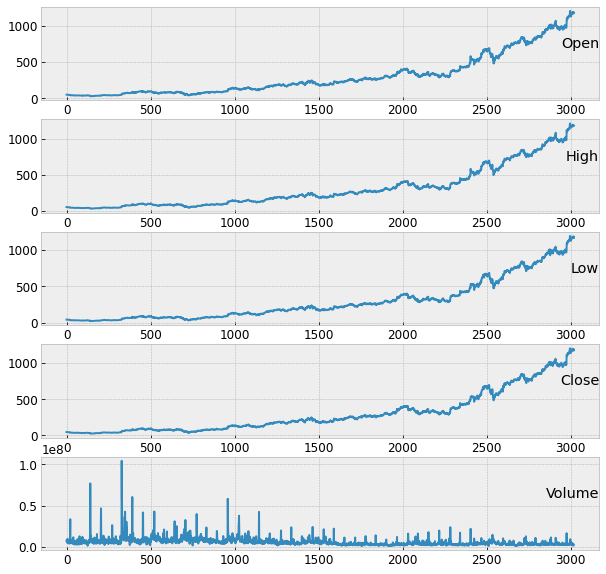

Enter the Target Column :Close


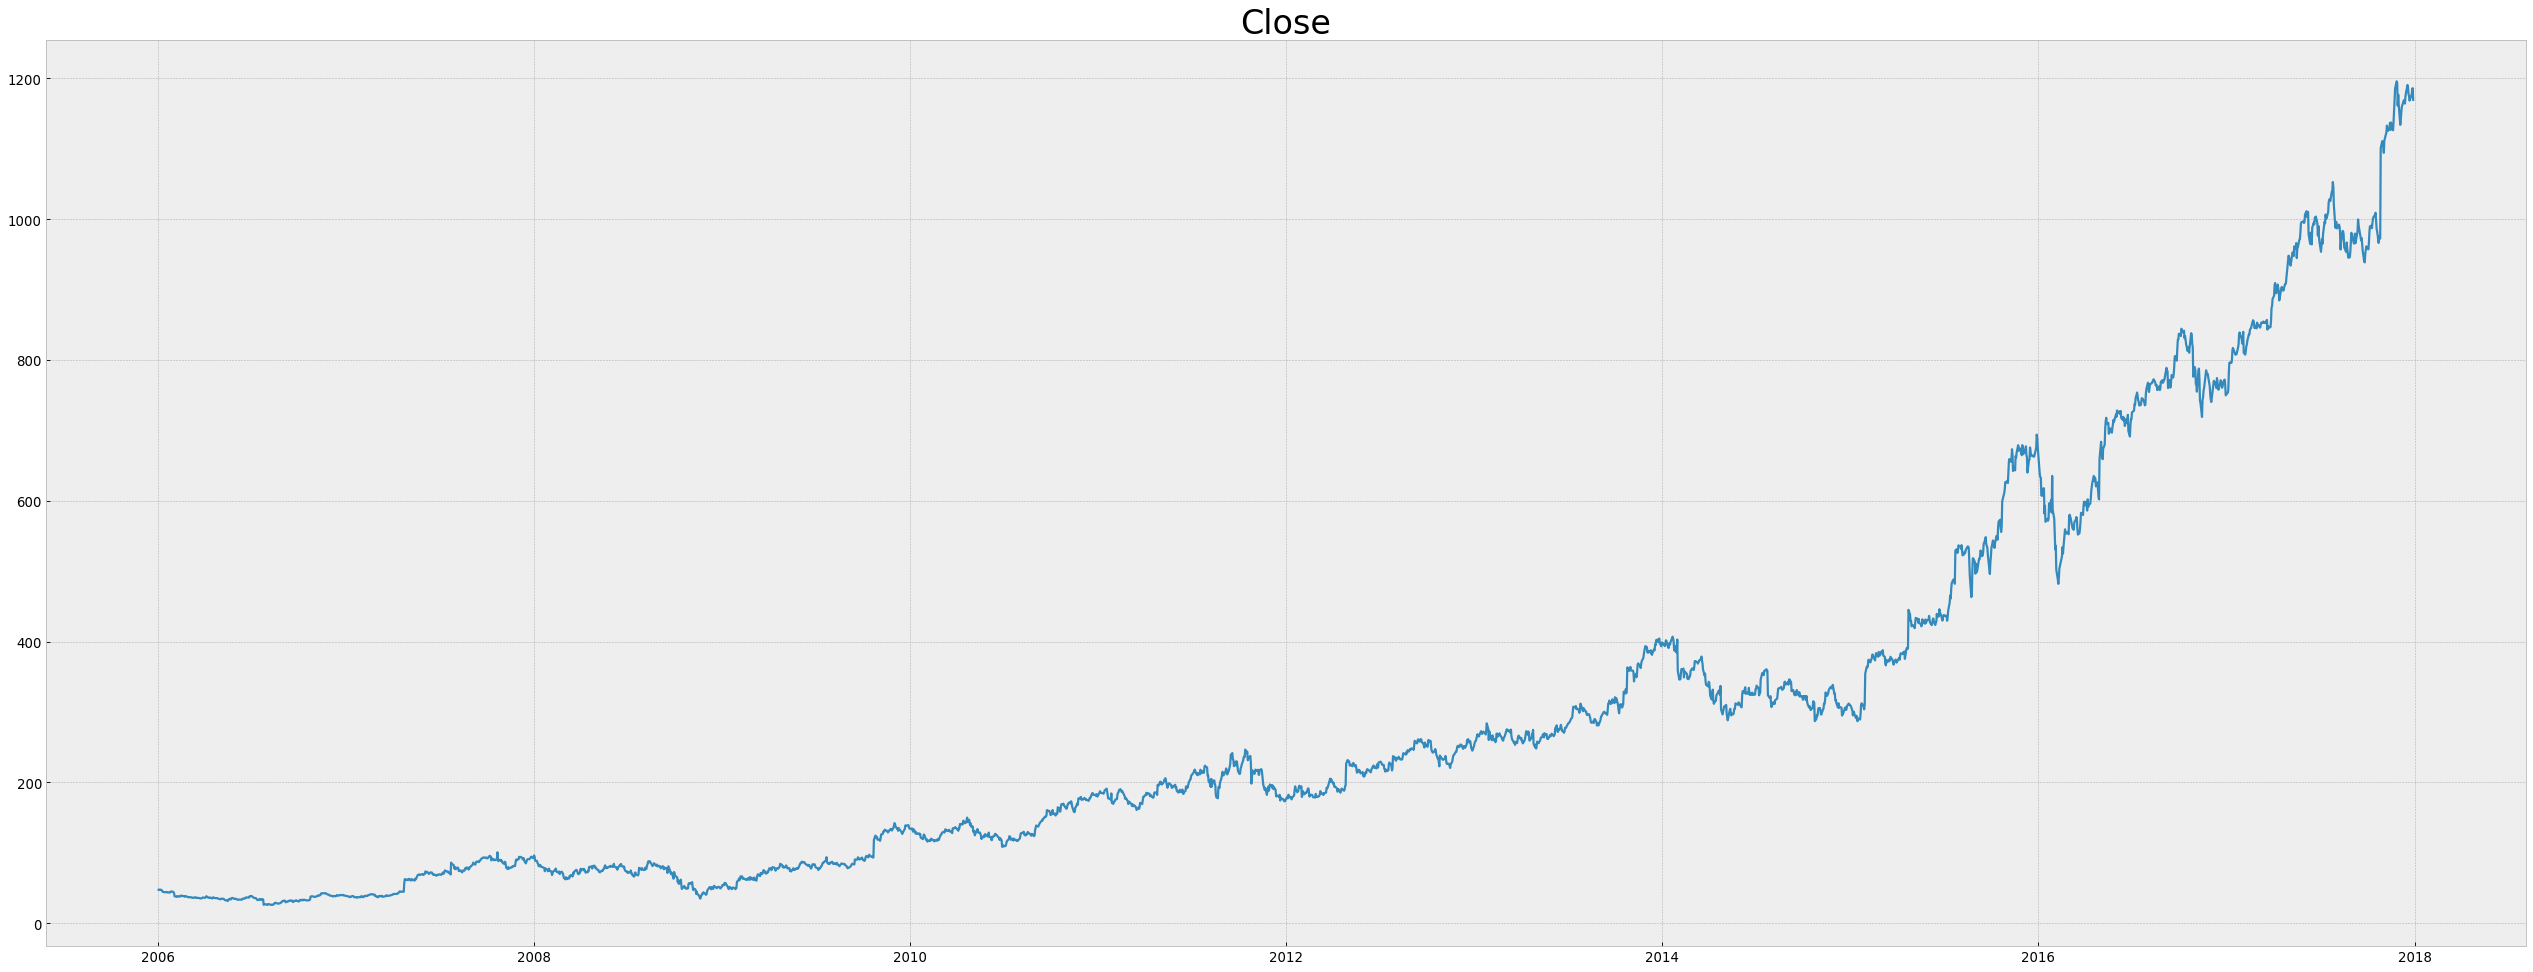

Do you want to add any other column as a predictor in the timeseries? [Separate by commas if you want to add multiple predictors || Press Enter to Continue without adding Predictors] Open
Visualising the final DataFrame
            Close   Open
Datetime                
2006-01-03  47.58  47.47
2006-01-04  47.25  47.48
2006-01-05  47.65  47.16
2006-01-06  47.87  47.97
2006-01-09  47.08  46.55
2006-01-10  45.65  46.41
2006-01-11  44.93  45.65
2006-01-12  44.36  44.79
2006-01-13  44.40  44.48
2006-01-17  44.00  43.95
The various analysis' that can performed on the data without any resampling are 
['Yearly', 'Monthly', 'Daily']
Hint: Performing Resampling will decrease the size of your dataset, the higher the degree of resampling;
The smaller the dataset. For optimal performance only choose to resample when you have sufficient data or choose to perform the forecast in the period that the data was originally collected
Do you want to perform Yearly forecasts[y if Yes, anything else if no]y
P

<Figure size 4000x1600 with 0 Axes>

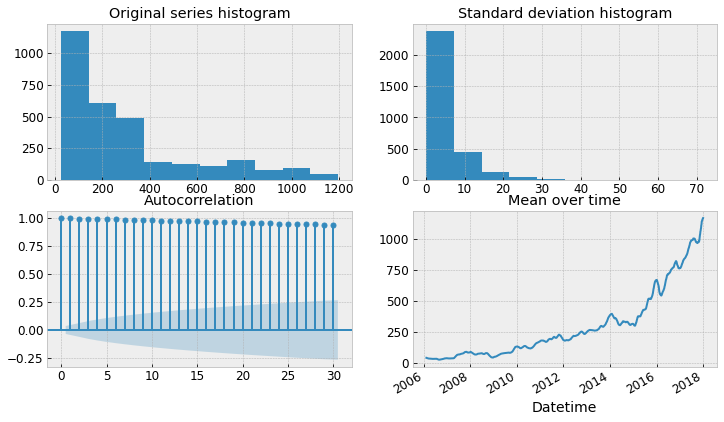

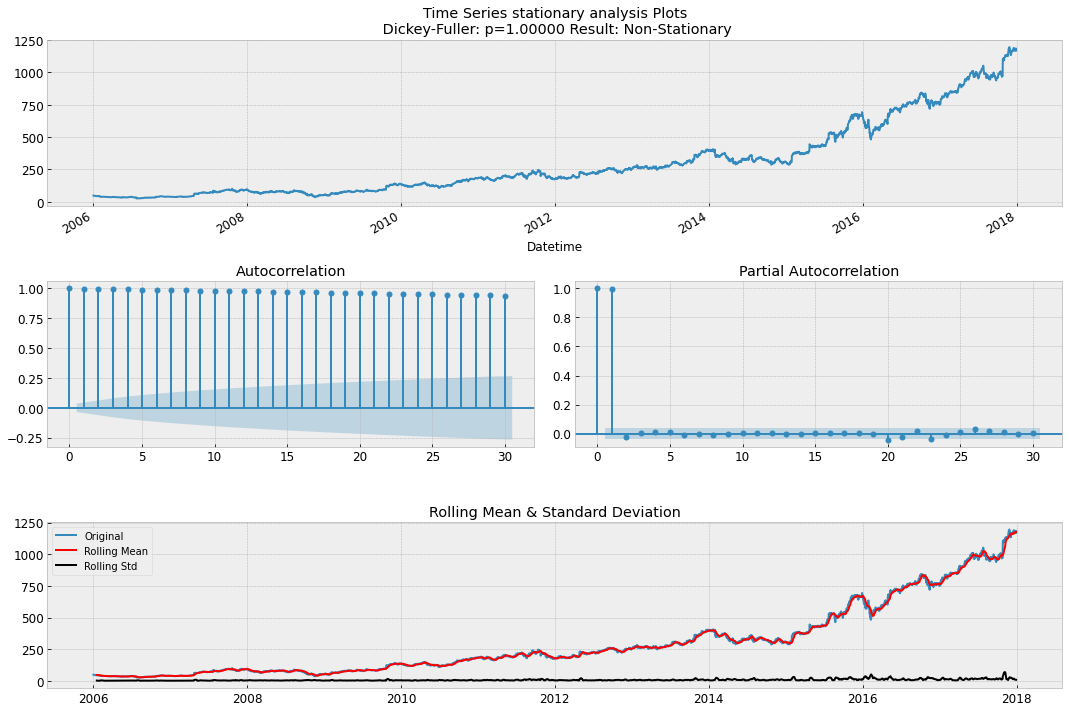

  3%|▎         | 8/301 [00:00<00:03, 76.93it/s]

We have 2718 days of training data and 301 days of testing data 
HWES Running...


100%|██████████| 301/301 [00:03<00:00, 81.70it/s]


Bayesian Model Running...
Lasso Model Running...
Random Forest Running...
XGB Running...
LGBM Running...
SVM Running...
KNN Running...
Trying XGB + Light Ensemble...
Trying RF + XGBoost Ensemble...
Trying RF + Light Ensemble...
Trying XG + RF + Light Ensemble...
Total Modelling Time Taken : 8.681470155715942


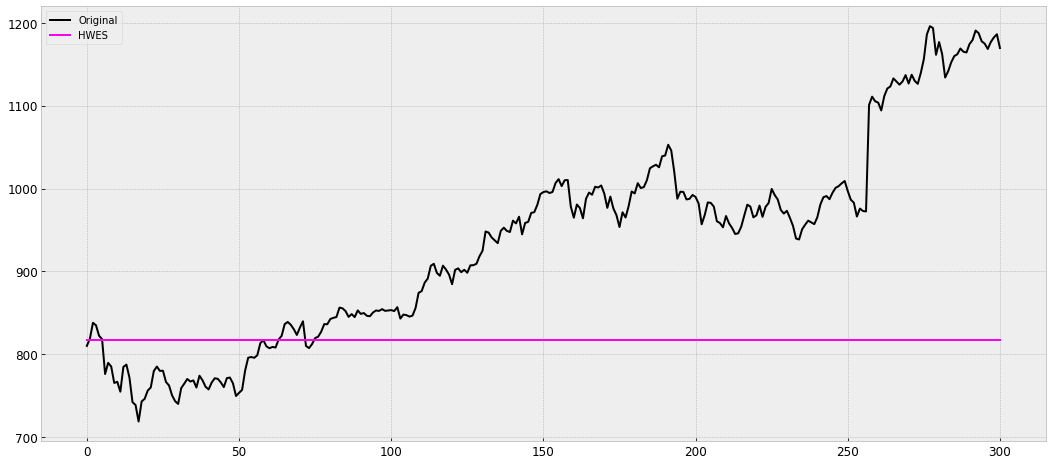

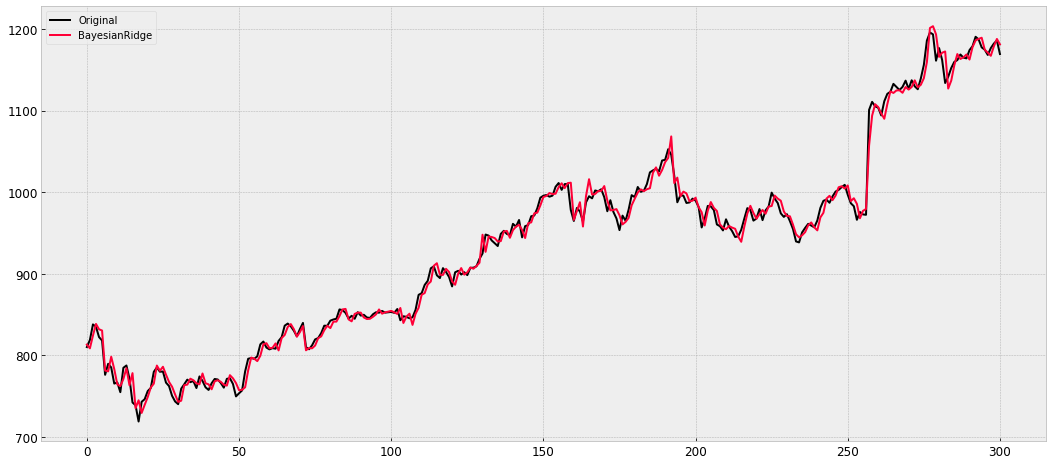

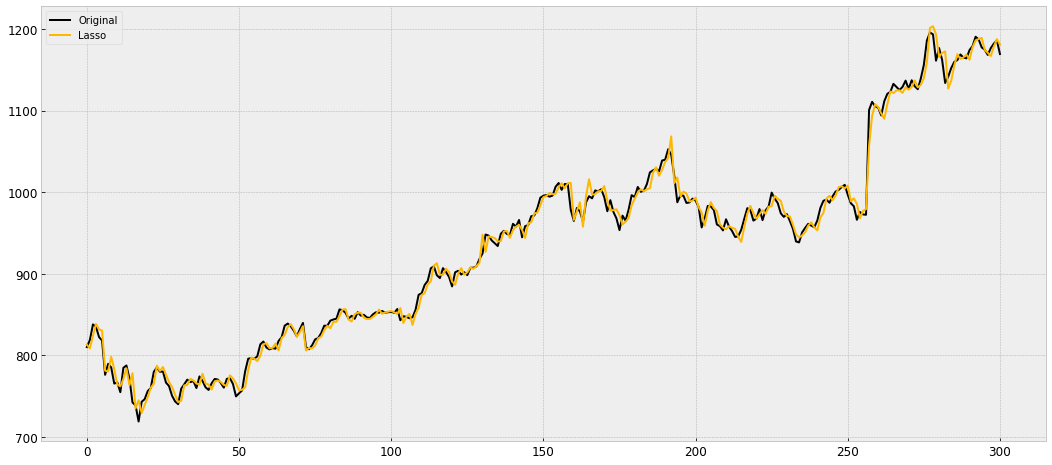

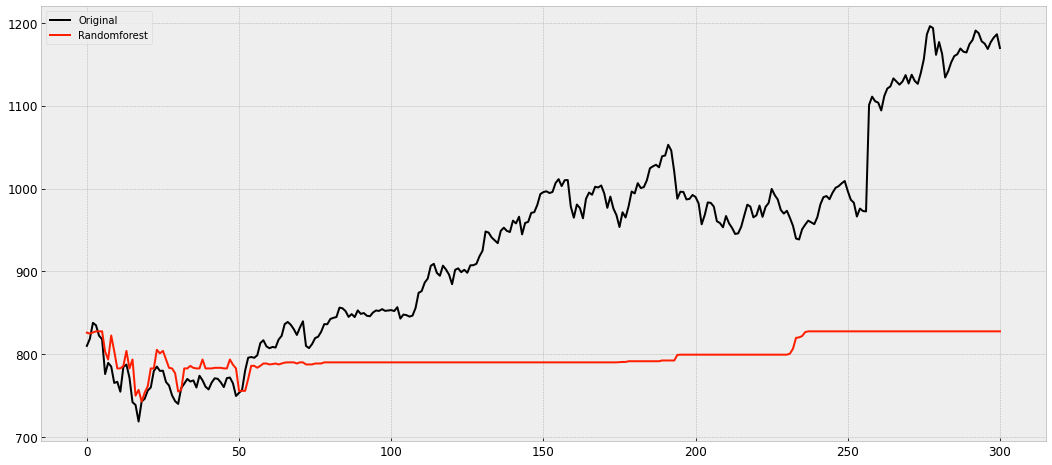

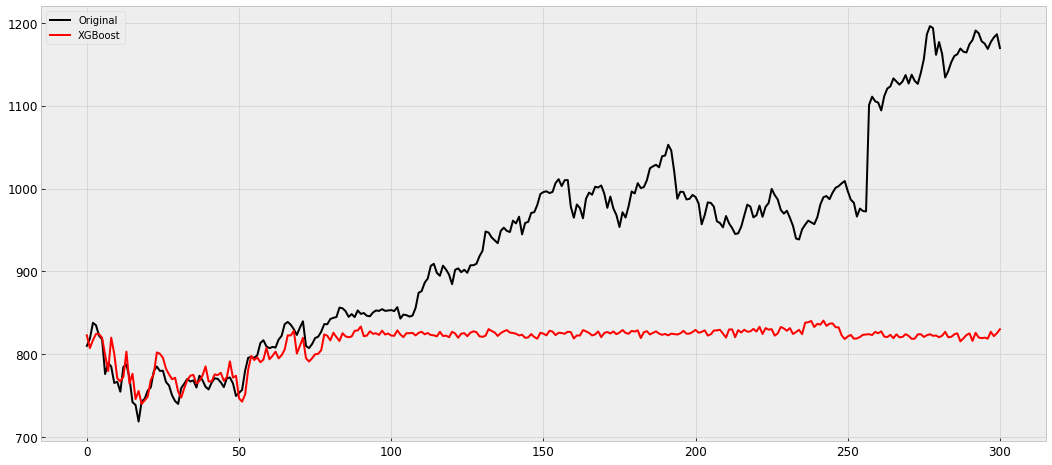

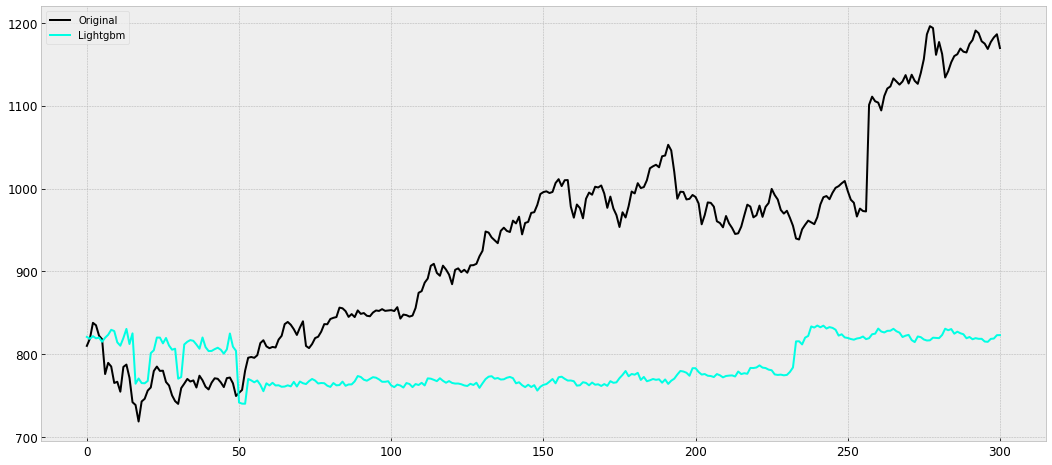

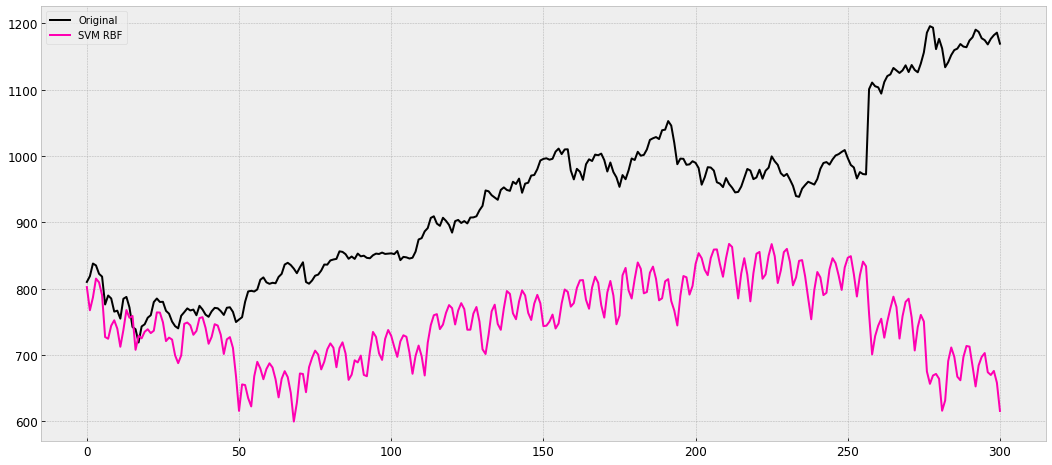

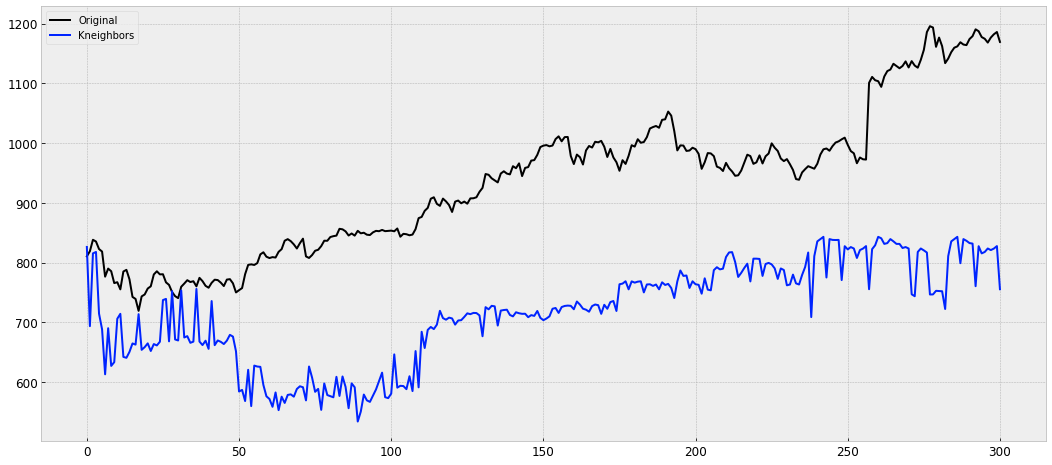

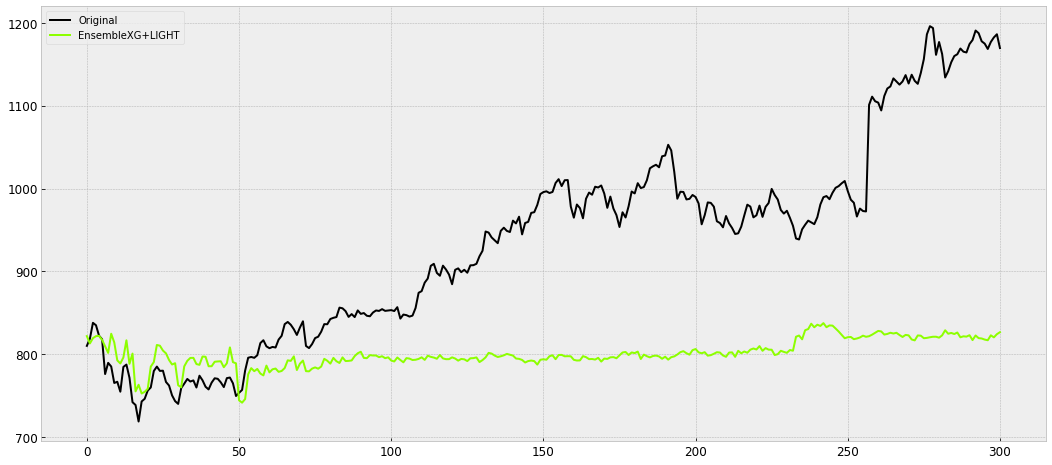

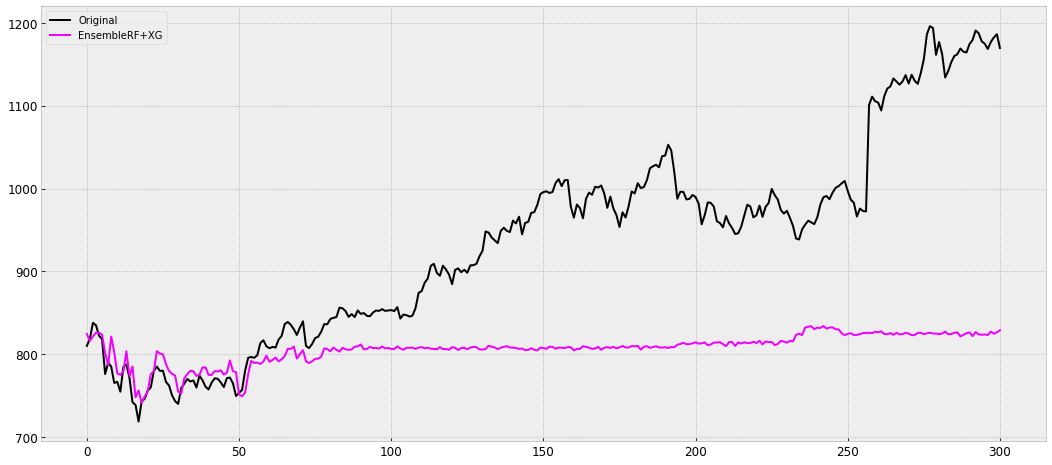

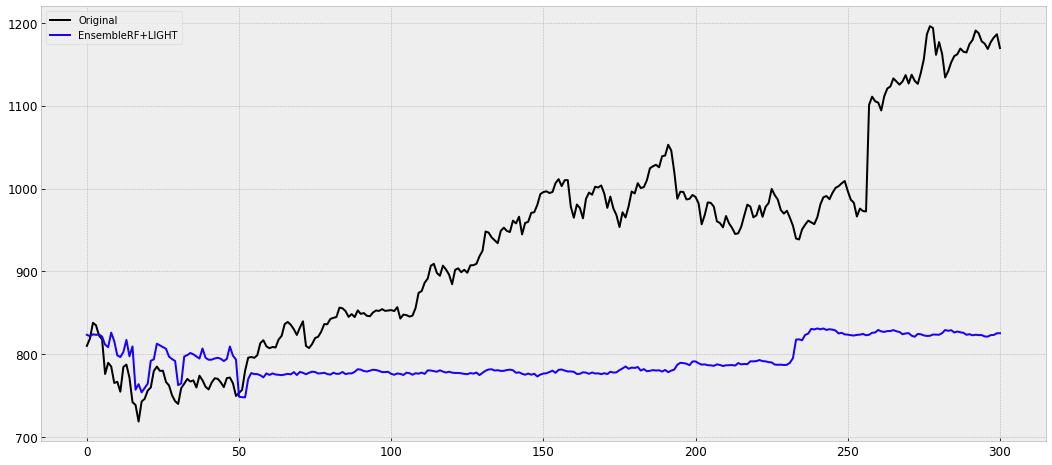

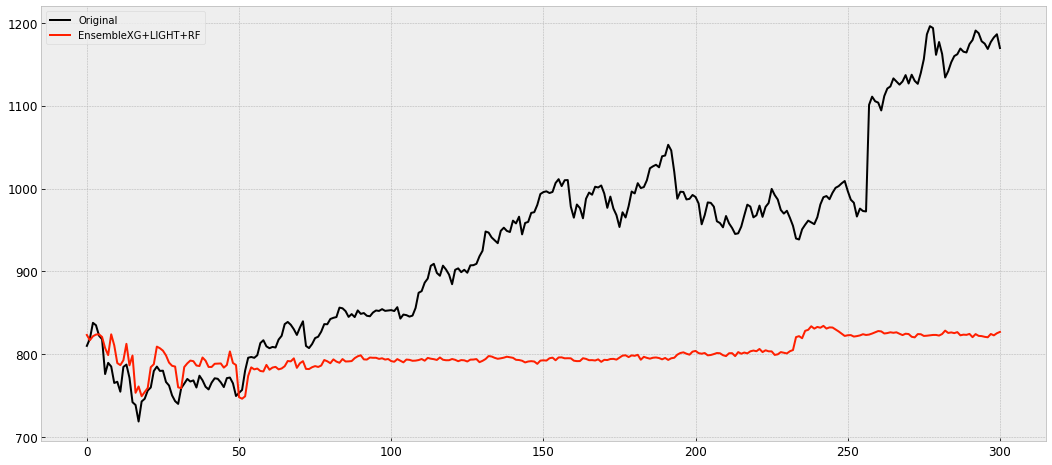

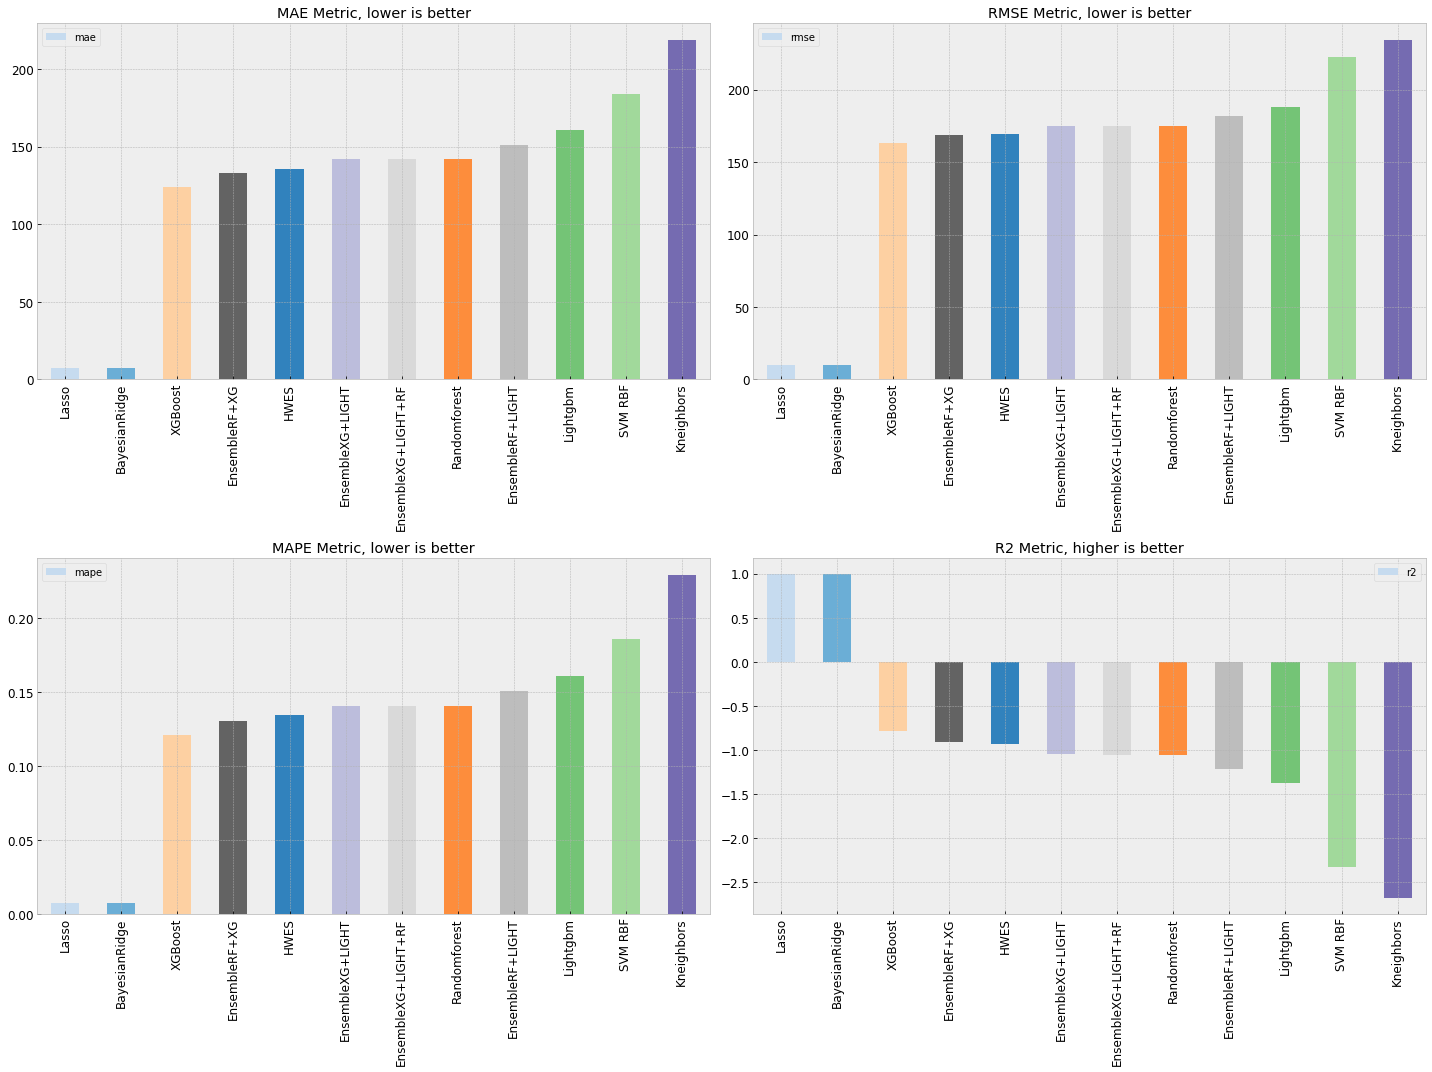


Model Information Table [sorted by MAPE score]
╒════╤═════════════════════╤═══════════╤═══════════╤════════════╤═══════════╕
│    │ Model               │       MAE │      RMSE │       MAPE │        R2 │
╞════╪═════════════════════╪═══════════╪═══════════╪════════════╪═══════════╡
│  0 │ Lasso               │   7.08651 │   9.76452 │ 0.00761365 │  0.993598 │
├────┼─────────────────────┼───────────┼───────────┼────────────┼───────────┤
│  1 │ BayesianRidge       │   7.09433 │   9.77091 │ 0.00762337 │  0.99359  │
├────┼─────────────────────┼───────────┼───────────┼────────────┼───────────┤
│  2 │ XGBoost             │ 123.862   │ 162.979   │ 0.12059    │ -0.783383 │
├────┼─────────────────────┼───────────┼───────────┼────────────┼───────────┤
│  3 │ EnsembleRF+XG       │ 132.844   │ 168.694   │ 0.130401   │ -0.910665 │
├────┼─────────────────────┼───────────┼───────────┼────────────┼───────────┤
│  4 │ HWES                │ 135.517   │ 169.613   │ 0.134336   │ -0.931537 │
├────┼──────────

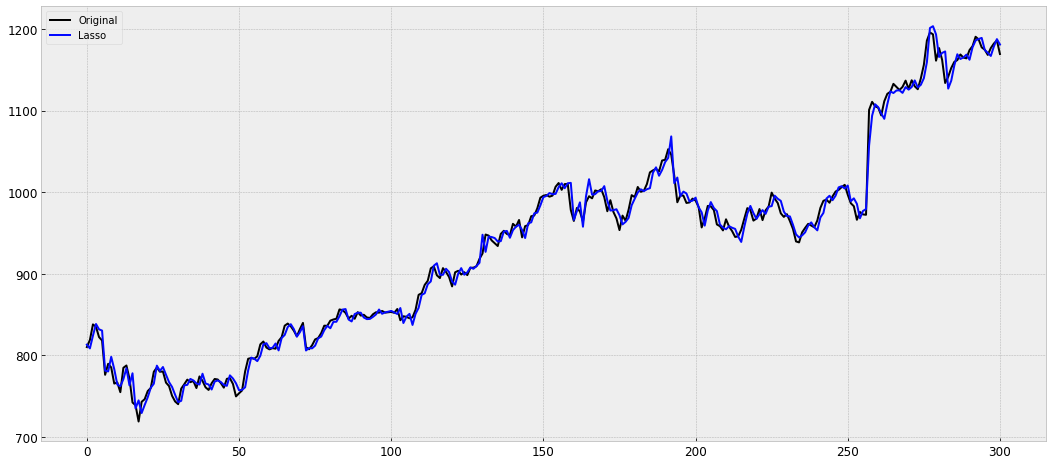

Process Success : Time Taken 39.512897968292236


In [2]:
start = time.time()
complete = INIT()
if complete is None:
    print("Process Failed")
else:
    print(f"Process Success : Time Taken {time.time()-start}")